
## SPAM Classification

In [31]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("spam").master("local[*]").getOrCreate()

# File location and type
file_location = "data/spamham.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .option("quote", '"') \
  .option("escape", '"') \
  .load(file_location)

df.show()

+--------------------+----+
|                text|spam|
+--------------------+----+
|Subject: naturall...|   1|
|Subject: the stoc...|   1|
|Subject: unbeliev...|   1|
|Subject: 4 color ...|   1|
|Subject: do not h...|   1|
|Subject: great nn...|   1|
|Subject: here ' s...|   1|
|Subject: save you...|   1|
|Subject: undelive...|   1|
|Subject: save you...|   1|
|Subject: las vega...|   1|
|Subject: save you...|   1|
|Subject: brighten...|   1|
|Subject: wall str...|   1|
|Subject: fpa noti...|   1|
|Subject: search e...|   1|
|Subject: only our...|   1|
|Subject: localize...|   1|
|Subject: security...|   1|
|Subject: 21 st ce...|   1|
+--------------------+----+
only showing top 20 rows


In [32]:
def toHtml(self):
    """Returns a dataframe - supports spark lines"""
    import cgi
    from itertools import islice
    if not self._support_repr_html:
        self._support_repr_html = True
    max_num_rows = max(self.sql_ctx._conf.replEagerEvalMaxNumRows(), 0)
    sock_info = self._jdf.getRowsToPython(
    max_num_rows, self.sql_ctx._conf.replEagerEvalTruncate())
    rows = islice(self.toLocalIterator(), 0, max_num_rows)
 
    html = "</pre>\n" #generate table header html += " \n" % " ".join(map(lambda x: cgi.escape(x), df.columns)) #generate table rows for row in rows: html += " \n" % "".join(map(lambda x: str(x), row)) 
    html += '<table border="1"><tbody><tr><th>%s</th></tr><tr><td>%s</td></tr></tbody></table><pre>\n'
    html += "only showing upto %d %s\n" % (max_num_rows, "row" if max_num_rows == 1 else "rows")
    return html

from pyspark.sql.dataframe import DataFrame
DataFrame._repr_html_ = toHtml
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

In [33]:
display(df)

text,spam
Subject: naturall...,1
Subject: the stoc...,1
Subject: unbeliev...,1
Subject: 4 color ...,1
Subject: do not h...,1
Subject: great nn...,1
Subject: here ' s...,1
Subject: save you...,1
Subject: undelive...,1
Subject: save you...,1


In [34]:
def elim_subject(x):
  return "".join(x.split(":")[1:]).strip()

#t = "Subject: cigarettes wholesale ! hywwzzlzd  $ 19 . 95 and up ! buy cartons of cigarettes wholesale , starting at $ 19 . 95 .  free shipping !  why pay state taxes ? 100 % legal . mailed from swiss bonded warehouse . #for  personal use only , must be 18 years of age and older , verified by credit  card .  aol users click here  to be removed from future mailings , reply to this email with remove in the subject line ."

#print(elim_subject(t))
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

elim_subject_udf = udf(elim_subject, StringType())

df_processed = df.withColumn('message', elim_subject_udf(df['text']))
df_processed.show(100)



+--------------------+----+--------------------+
|                text|spam|             message|
+--------------------+----+--------------------+
|Subject: naturall...|   1|naturally irresis...|
|Subject: the stoc...|   1|the stock trading...|
|Subject: unbeliev...|   1|unbelievable new ...|
|Subject: 4 color ...|   1|4 color printing ...|
|Subject: do not h...|   1|do not have money...|
|Subject: great nn...|   1|great nnews  hell...|
|Subject: here ' s...|   1|here ' s a hot pl...|
|Subject: save you...|   1|save your money b...|
|Subject: undelive...|   1|undeliverable  ho...|
|Subject: save you...|   1|save your money b...|
|Subject: las vega...|   1|las vegas high ri...|
|Subject: save you...|   1|save your money b...|
|Subject: brighten...|   1|brighten those te...|
|Subject: wall str...|   1|wall street pheno...|
|Subject: fpa noti...|   1|fpa notice  ebay ...|
|Subject: search e...|   1|search engine pos...|
|Subject: only our...|   1|only our software...|
|Subject: localize..

In [35]:
from pyspark.ml.feature import Tokenizer
tokenizer = Tokenizer(inputCol='message', outputCol='words')
wordsData = tokenizer.transform(df_processed)
display(wordsData)
wordsData.show(50)

text,spam,message,words
Subject: naturall...,1,naturally irresis...,"[naturally, irres..."
Subject: the stoc...,1,the stock trading...,"[the, stock, trad..."
Subject: unbeliev...,1,unbelievable new ...,"[unbelievable, ne..."
Subject: 4 color ...,1,4 color printing ...,"[4, color, printi..."
Subject: do not h...,1,do not have money...,"[do, not, have, m..."
Subject: great nn...,1,great nnews hell...,"[great, nnews, , ..."
Subject: here ' s...,1,here ' s a hot pl...,"[here, ', s, a, h..."
Subject: save you...,1,save your money b...,"[save, your, mone..."
Subject: undelive...,1,undeliverable ho...,"[undeliverable, ,..."
Subject: save you...,1,save your money b...,"[save, your, mone..."


+--------------------+----+--------------------+--------------------+
|                text|spam|             message|               words|
+--------------------+----+--------------------+--------------------+
|Subject: naturall...|   1|naturally irresis...|[naturally, irres...|
|Subject: the stoc...|   1|the stock trading...|[the, stock, trad...|
|Subject: unbeliev...|   1|unbelievable new ...|[unbelievable, ne...|
|Subject: 4 color ...|   1|4 color printing ...|[4, color, printi...|
|Subject: do not h...|   1|do not have money...|[do, not, have, m...|
|Subject: great nn...|   1|great nnews  hell...|[great, nnews, , ...|
|Subject: here ' s...|   1|here ' s a hot pl...|[here, ', s, a, h...|
|Subject: save you...|   1|save your money b...|[save, your, mone...|
|Subject: undelive...|   1|undeliverable  ho...|[undeliverable, ,...|
|Subject: save you...|   1|save your money b...|[save, your, mone...|
|Subject: las vega...|   1|las vegas high ri...|[las, vegas, high...|
|Subject: save you..

In [36]:
from pyspark.ml.feature import CountVectorizer

df_test = spark.createDataFrame([
  (0, "a b c d".split(" ")),
  (1, "a b b c a".split(" "))
], ["id", "words"])
display(df_test)

id,words
0,"[a, b, c, d]"
1,"[a, b, b, c, a]"


In [37]:
cv = CountVectorizer(inputCol='words', outputCol='features', vocabSize=4, minDF=0.1)
model = cv.fit(df_test)
result = model.transform(df_test)
display(result)
for r in result.collect():
    print(r)
#result.show()

id,words,features
0,"[a, b, c, d]","(4,[0,1,2,3],[1.0..."
1,"[a, b, b, c, a]","(4,[0,1,2],[2.0,2..."


Row(id=0, words=['a', 'b', 'c', 'd'], features=SparseVector(4, {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}))
Row(id=1, words=['a', 'b', 'b', 'c', 'a'], features=SparseVector(4, {0: 2.0, 1: 2.0, 2: 1.0}))


In [38]:
from pyspark.ml.feature import CountVectorizer
cv = CountVectorizer(inputCol='words', outputCol='features')
model = cv.fit(wordsData)
featurizedDF = model.transform(wordsData)
display(featurizedDF)



Traceback (most recent call last):                                              
  File "/home/pol/dev/zajecia/pyspark-graphs/.venv/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/daemon.py", line 233, in manager
    code = worker(sock, authenticated)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/pol/dev/zajecia/pyspark-graphs/.venv/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/daemon.py", line 87, in worker
    outfile.flush()
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/home/pol/dev/zajecia/pyspark-graphs/.venv/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/daemon.py", line 233, in manager
    code = worker(sock, authenticated)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/pol/dev/zajecia/pyspark-graphs/.venv/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/daemon.py", line 87, in worker
    outfile.flush()
BrokenPipeError: [Errno 32] Broken pipe


text,spam,message,words,features
Subject: naturall...,1,naturally irresis...,"[naturally, irres...","(37440,[0,1,2,3,4..."
Subject: the stoc...,1,the stock trading...,"[the, stock, trad...","(37440,[0,4,7,19,..."
Subject: unbeliev...,1,unbelievable new ...,"[unbelievable, ne...","(37440,[0,1,2,3,4..."
Subject: 4 color ...,1,4 color printing ...,"[4, color, printi...","(37440,[0,1,2,3,6..."
Subject: do not h...,1,do not have money...,"[do, not, have, m...","(37440,[0,2,3,4,5..."
Subject: great nn...,1,great nnews hell...,"[great, nnews, , ...","(37440,[0,1,2,3,4..."
Subject: here ' s...,1,here ' s a hot pl...,"[here, ', s, a, h...","(37440,[0,1,2,3,4..."
Subject: save you...,1,save your money b...,"[save, your, mone...","(37440,[0,1,2,4,5..."
Subject: undelive...,1,undeliverable ho...,"[undeliverable, ,...","(37440,[0,1,2,3,4..."
Subject: save you...,1,save your money b...,"[save, your, mone...","(37440,[0,1,2,4,5..."


In [39]:
from pyspark.ml.feature import IDF
from pyspark.sql.functions import col

idf = IDF(inputCol="features", outputCol="idfFeatures")
idfModel = idf.fit(featurizedDF)
rescaledData = idfModel.transform(featurizedDF)
#display(rescaledData)

dataForTraining = rescaledData.select(col('spam').alias('label'), col('idfFeatures').alias('features'))
display(dataForTraining)
dft = dataForTraining.collect()
for i in range(5):
    print(dft[i])    


label,features
1,"(37440,[0,1,2,3,4..."
1,"(37440,[0,4,7,19,..."
1,"(37440,[0,1,2,3,4..."
1,"(37440,[0,1,2,3,6..."
1,"(37440,[0,2,3,4,5..."
1,"(37440,[0,1,2,3,4..."
1,"(37440,[0,1,2,3,4..."
1,"(37440,[0,1,2,4,5..."
1,"(37440,[0,1,2,3,4..."
1,"(37440,[0,1,2,4,5..."


Row(label=1, features=SparseVector(37440, {0: 0.0136, 1: 0.9384, 2: 0.1229, 3: 0.3106, 4: 0.5982, 5: 0.3737, 7: 1.1444, 8: 1.1496, 10: 1.3061, 11: 0.7518, 12: 0.6907, 14: 218.482, 15: 0.2669, 19: 1.1246, 21: 0.6526, 23: 0.536, 26: 1.9378, 27: 3.8486, 28: 1.1117, 30: 0.5468, 31: 1.8873, 33: 3.9987, 35: 0.5121, 36: 0.7113, 38: 1.4592, 39: 0.6891, 52: 1.9343, 56: 0.997, 69: 1.2285, 75: 2.4968, 78: 6.2347, 83: 1.5288, 90: 1.4979, 92: 3.0194, 94: 3.5438, 111: 1.4901, 117: 1.6677, 120: 6.4069, 131: 1.7277, 134: 2.0043, 135: 4.4994, 142: 3.5193, 144: 1.6751, 174: 1.8235, 177: 2.4072, 184: 2.4091, 186: 2.0386, 191: 3.7997, 194: 2.1887, 234: 2.1887, 237: 2.1887, 247: 4.307, 268: 2.5264, 271: 2.3452, 282: 2.465, 300: 2.4327, 307: 2.4712, 313: 5.6605, 332: 2.5507, 376: 2.933, 428: 2.7561, 435: 3.0114, 465: 2.92, 471: 2.9007, 478: 2.9103, 482: 6.2959, 485: 2.8273, 515: 3.1003, 516: 2.9232, 533: 3.0185, 549: 3.1685, 588: 2.92, 716: 6.7709, 719: 7.2327, 728: 3.6229, 732: 3.2551, 765: 3.3701, 809: 3.

In [40]:
trainDF, testDF = dataForTraining.randomSplit([0.8, 0.2])
print(trainDF.count())
print(testDF.count())

4608


[Stage 4528:==================>                                     (1 + 2) / 3]

1120


In [41]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import numpy as np

lr = LogisticRegression(maxIter = 10)

regParamValues = np.linspace(0.3, 0.01, 4)
print(regParamValues)
elasticNetParamValues = np.linspace(0.3, 0.8, 4)
print(elasticNetParamValues)

paramGr_LR = ParamGridBuilder()\
  .addGrid(lr.regParam, regParamValues)\
  .addGrid(lr.elasticNetParam, elasticNetParamValues)\
  .build()

crossValid_LR = CrossValidator(estimator=lr, estimatorParamMaps=paramGr_LR, evaluator=BinaryClassificationEvaluator(), numFolds=5)
cvModel = crossValid_LR.fit(trainDF)
best_model_lr = cvModel.bestModel
best_model_summary = best_model_lr.summary
print(best_model_summary.predictions.columns)
best_model_summary 



[0.3        0.20333333 0.10666667 0.01      ]
[0.3        0.46666667 0.63333333 0.8       ]
['label', 'features', 'rawPrediction', 'probability', 'prediction']


In [42]:
my_eval_lr = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='label', metricName='areaUnderROC')
areaUnderROC = my_eval_lr.evaluate(best_model_summary.predictions)
print(areaUnderROC)

0.9448700458430884


In [ ]:
#my_eval_lr.setMetricName('ROC')

In [43]:

train_fit_lr = best_model_summary.predictions.select('label','prediction')
train_fit_lr.groupBy('label', 'prediction').count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|  985|
|  1.0|       0.0|  121|
|  0.0|       0.0| 3499|
|  0.0|       1.0|    3|
+-----+----------+-----+



In [44]:
summary = best_model_summary
#print("Intercept:", model.intercept)
#print("Coefficients:", model.coefficients)

#summary = model.summary

print("Accuracy:", summary.accuracy)
print("Area Under ROC:", summary.areaUnderROC)
print("False Positive Rate by label:", summary.falsePositiveRateByLabel)
print("True Positive Rate by label:", summary.truePositiveRateByLabel)

#summary.confusionMatrix()

model = cvModel.bestModel

predictions = best_model_summary.predictions

#print("Intercept:", model.intercept)
#print("Coefficients:", model.coefficients)
tp = predictions.filter((col("label") == 1) & (col("prediction") == 1)).count()
tn = predictions.filter((col("label") == 0) & (col("prediction") == 0)).count()
fp = predictions.filter((col("label") == 0) & (col("prediction") == 1)).count()
fn = predictions.filter((col("label") == 1) & (col("prediction") == 0)).count()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 score:  {f1:.4f}")

summary = model.summary
print("Accuracy:", summary.accuracy)
print("Area Under ROC:", summary.areaUnderROC)



Accuracy: 0.9730902777777778
Area Under ROC: 0.9995792897471142
False Positive Rate by label: [0.10940325497287523, 0.0008566533409480297]
True Positive Rate by label: [0.999143346659052, 0.8905967450271248]
Precision: 0.9970
Recall:    0.8906
F1 score:  0.9408
Accuracy: 0.9730902777777778
Area Under ROC: 0.9995792897471142


In [45]:
summary = model.summary
roc_df = summary.roc
roc_df.show(5)

+---+--------------------+
|FPR|                 TPR|
+---+--------------------+
|0.0|                 0.0|
|0.0|0.003616636528028933|
|0.0|0.007233273056057866|
|0.0|  0.0108499095840868|
|0.0|0.014466546112115732|
+---+--------------------+
only showing top 5 rows


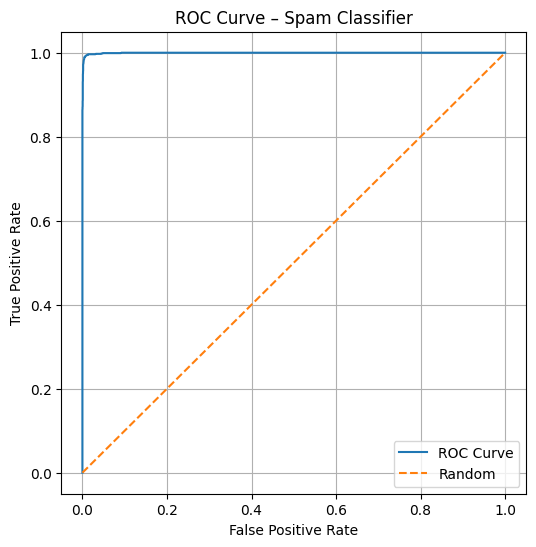

In [46]:
import matplotlib.pyplot as plt

roc_pd = roc_df.toPandas()

plt.figure(figsize=(6, 6))
plt.plot(roc_pd["FPR"], roc_pd["TPR"], label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Spam Classifier")
plt.legend()
plt.grid(True)
plt.show()


In [47]:
from pyspark.ml.functions import vector_to_array
from pyspark.sql.functions import col

predictions = model.transform(testDF)

roc_input = predictions.select(
    col("label").cast("double"),
    vector_to_array("probability")[1].alias("score")  # P(spam)
)

In [37]:
roc_input.show(5)

+-----+--------------------+
|label|               score|
+-----+--------------------+
|  0.0| 0.09054375399861636|
|  0.0|6.826054225494982E-5|
|  0.0| 0.05928033647787412|
|  0.0| 0.02029234348865816|
|  0.0|0.001841025287734...|
+-----+--------------------+
only showing top 5 rows


In [48]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(
    labelCol="label",
    rawPredictionCol="score",
    metricName="areaUnderROC"
)

auc = evaluator.evaluate(roc_input)
print("Area Under ROC:", auc)


Area Under ROC: 0.9961876545846011


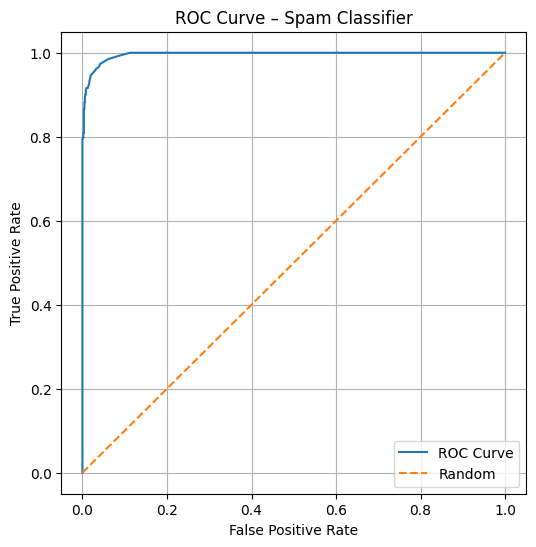

26/01/21 08:39:49 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 50120395 ms exceeds timeout 120000 ms
26/01/21 08:39:49 WARN SparkContext: Killing executors is not supported by current scheduler.
26/01/21 08:39:49 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:53)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:359)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:132)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint

In [49]:
roc_pd = roc_input.toPandas()

import matplotlib.pyplot as plt
import numpy as np

thresholds = np.linspace(0, 1, 100)
tpr, fpr = [], []

for t in thresholds:
    preds = (roc_pd["score"] >= t).astype(int)

    tp = ((preds == 1) & (roc_pd["label"] == 1)).sum()
    fp = ((preds == 1) & (roc_pd["label"] == 0)).sum()
    fn = ((preds == 0) & (roc_pd["label"] == 1)).sum()
    tn = ((preds == 0) & (roc_pd["label"] == 0)).sum()

    tpr.append(tp / (tp + fn) if tp + fn > 0 else 0)
    fpr.append(fp / (fp + tn) if fp + tn > 0 else 0)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Spam Classifier")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
#test_predictions = cvModel.transform(testDF)
#test_predictions.show(100)

In [ ]:
test_predictions.groupBy('label', 'prediction').count().show()

+-----+----------+-----+
label|prediction|count|
+-----+----------+-----+
 1| 0.0| 37|
 0| 0.0| 883|
 1| 1.0| 238|
 0| 1.0| 6|
+-----+----------+-----+

In [ ]:
print(my_eval_lr.evaluate(test_predictions))

0.9293526945495449

In [30]:
# Naive Bayes
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes()
paramGrid_nb = ParamGridBuilder() \
    .addGrid(nb.smoothing, np.linspace(0.3, 10, 10)) \
    .build()
crossval_nb = CrossValidator(estimator=nb,
                          estimatorParamMaps=paramGrid_nb,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds= 10) 
cvModel_nb = crossval_nb.fit(trainDF)


26/01/20 07:16:21 WARN DAGScheduler: Broadcasting large task binary with size 1265.2 KiB
26/01/20 07:16:23 WARN DAGScheduler: Broadcasting large task binary with size 1265.2 KiB
26/01/20 07:16:23 WARN DAGScheduler: Broadcasting large task binary with size 1265.2 KiB
26/01/20 07:16:23 WARN DAGScheduler: Broadcasting large task binary with size 1265.2 KiB
26/01/20 07:16:24 WARN DAGScheduler: Broadcasting large task binary with size 1265.2 KiB
26/01/20 07:16:24 WARN DAGScheduler: Broadcasting large task binary with size 1265.2 KiB
26/01/20 07:16:25 WARN DAGScheduler: Broadcasting large task binary with size 1265.2 KiB
26/01/20 07:16:25 WARN DAGScheduler: Broadcasting large task binary with size 1265.2 KiB
26/01/20 07:16:26 WARN DAGScheduler: Broadcasting large task binary with size 1265.2 KiB
26/01/20 07:16:26 WARN DAGScheduler: Broadcasting large task binary with size 1265.2 KiB
26/01/20 07:16:27 WARN DAGScheduler: Broadcasting large task binary with size 1265.2 KiB
26/01/20 07:16:28 WAR

In [ ]:
predictions_nb = cvModel_nb.transform(testDF)
predictions_nb.groupBy('label','prediction').count().show()

+-----+----------+-----+
label|prediction|count|
+-----+----------+-----+
 1| 0.0| 2|
 0| 0.0| 876|
 1| 1.0| 273|
 0| 1.0| 13|
+-----+----------+-----+

In [ ]:
my_eval_nb = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='label', metricName='areaUnderROC')
my_eval_nb.evaluate(predictions_nb)

Out[19]: 0.9890520503118928